In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("./Bank_Personal_Loan_Modelling.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Description:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\$000)
- ZIPCode: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\$000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any (\$000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by UniversalBank?

In [4]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(5000, 14)

## Binary categories
### Counts of both classes in binary variables

In [7]:
## Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(data['Personal Loan'].value_counts())

## Securities Account - Does the customer have a securities account with the bank?
print(data['Securities Account'].value_counts())

## CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
print(data['CD Account'].value_counts())

## Online - Does the customer use internet banking facilities?
print(data['Online'].value_counts())

## Credit Card - Does the customer use a credit card issued by UniversalBank?
print(data['CreditCard'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


## Interval categories: experience, age, income, CC avg and mortgage.

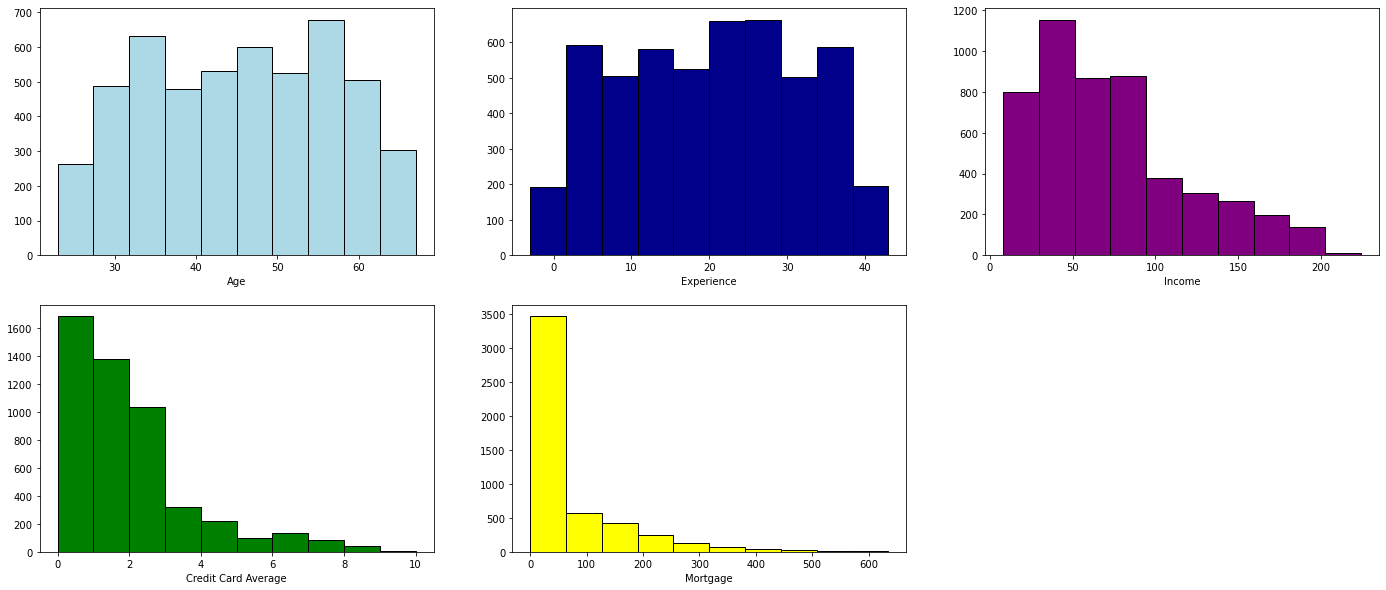

In [8]:
plt.figure(figsize= (24,10))
plt.subplot(2,3,1)
plt.hist(data.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(2,3,2)
plt.hist(data.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(2,3,3)
plt.hist(data.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(2,3,4)
plt.hist(data.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(2,3,5)
plt.hist(data.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

## Ordinal categories: family and education

In [9]:
# Family (mostly 1)
print(data['Family'].value_counts())

# Education - Education level of the customer (mostly 1)
print(data['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


## Counts for target variable

<AxesSubplot:>

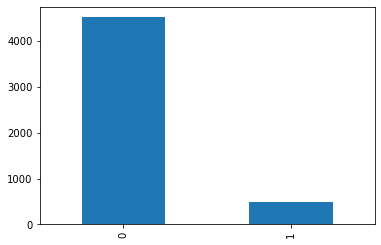

In [10]:
## Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
data['Personal Loan'].value_counts().plot(kind='bar')

## Data processing

In [11]:
median_age = data[data.Experience >= 0].groupby('Age')['Experience'].median().to_frame('Median Experience')

In [13]:
data = pd.merge(data, median_age, on = "Age", how = "left")

In [14]:
indices = data[data.Experience < 0].index

In [15]:
data.loc[data.Experience < 0, 'Experience'] = np.round(data['Median Experience'])

In [16]:
any(data.iloc[indices]['Age'] < 0)

False

In [17]:
data.isnull().sum()

ID                     0
Age                    0
Experience            12
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Median Experience     12
dtype: int64

In [18]:
data.loc[data.Experience.isnull()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Median Experience
670,671,23,NaN,61,92374,4,2.60,1,239,0,0,0,1,0,NaN
909,910,23,NaN,149,91709,1,6.33,1,305,0,0,0,0,1,NaN
2430,2431,23,NaN,73,92120,4,2.60,1,0,0,0,0,1,0,NaN
2618,2619,23,NaN,55,92704,3,2.40,2,145,0,0,0,1,0,NaN
2717,2718,23,NaN,45,95422,4,0.60,2,0,0,0,0,1,1,NaN
2962,2963,23,NaN,81,91711,2,1.80,2,0,0,0,0,0,0,NaN
3130,3131,23,NaN,82,92152,2,1.80,2,0,0,1,0,0,1,NaN
3157,3158,23,NaN,13,94720,4,1.00,1,84,0,0,0,1,0,NaN
3425,3426,23,NaN,12,91605,4,1.00,1,90,0,0,0,1,0,NaN
3824,3825,23,NaN,12,95064,4,1.00,1,0,0,1,0,0,1,NaN


In [19]:
data.loc[data.Age == 24, 'Experience'].value_counts()

0.0    28
Name: Experience, dtype: int64

In [20]:
data.loc[data.Age == 23, 'Experience'] = 0

In [21]:
data.dtypes

ID                      int64
Age                     int64
Experience            float64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Median Experience     float64
dtype: object

## Remove unnecessary variables

In [22]:
data.drop(['ID','ZIP Code', 'Median Experience'], axis = 1, inplace = True)

## Observations

### Education

In [23]:
data.groupby("Education")['Personal Loan'].value_counts()

Education  Personal Loan
1          0                2003
           1                  93
2          0                1221
           1                 182
3          0                1296
           1                 205
Name: Personal Loan, dtype: int64

In [24]:
ed1 = len(data[data.Education.isin([1]) & data["Personal Loan"].isin([1])])/len(data[data.Education.isin([1]) & data["Personal Loan"].isin([0])])
ed2 = len(data[data.Education.isin([2]) & data["Personal Loan"].isin([1])])/len(data[data.Education.isin([2]) & data["Personal Loan"].isin([0])])
ed3 = len(data[data.Education.isin([3]) & data["Personal Loan"].isin([1])])/len(data[data.Education.isin([3]) & data["Personal Loan"].isin([0])])

print("The ratio of those who accept the loan to those who don't, grouped by their education level ordered from lowest to highest, are %f, %f, and %f, respectively." % (ed1, ed2, ed3))

The ratio of those who accept the loan to those who don't, grouped by their education level ordered from lowest to highest, are 0.046430, 0.149058, and 0.158179, respectively.


It seems like the higher the education level, the more likely it is for the customer to take a personal loan.

## Relationship with Income

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

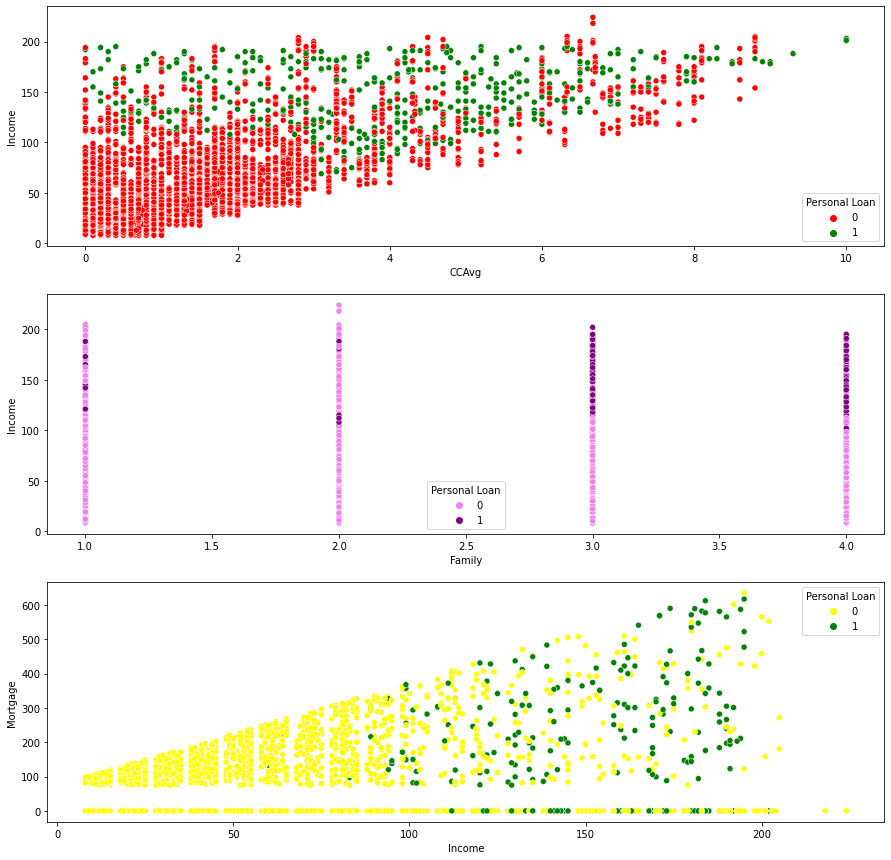

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

sns.scatterplot(x = data.CCAvg, y = data.Income, hue = data['Personal Loan'], palette = ['red','green'], ax=ax1)

sns.scatterplot(x = data.Family, y = data.Income, hue = data['Personal Loan'], palette = ['violet','purple'], ax=ax2)

sns.scatterplot(x = data.Income, y = data.Mortgage, hue = data['Personal Loan'], palette = ['yellow','green'], ax=ax3)


- Most who have a low CCAvg don't have a personal loan and vice versa.
- Of those who do have a personal loan, most are within the higher income range.
- As the CCAvg increases, the # of people who have the loan increases.
- As the size of family increases, the necessity of the personal loan also increases.
- The higher the income, the higher the mortgage, and the higher the necessity of the personal loan.

In [26]:
data.groupby('Education')['Income'].median()

Education
1    79
2    54
3    59
Name: Income, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

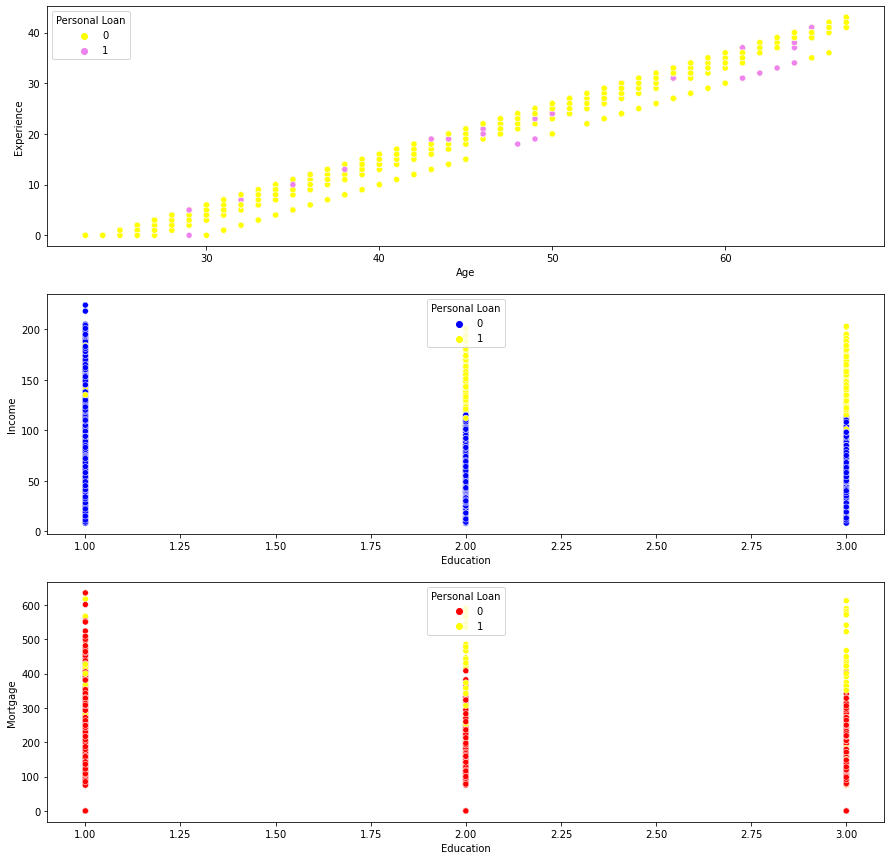

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

sns.scatterplot(x = data.Age, y = data.Experience, hue = data['Personal Loan'], palette = ['yellow','violet'], ax = ax1)

sns.scatterplot(x = data.Education, y = data.Income, hue = data['Personal Loan'], palette = ['blue','yellow'], ax = ax2)

sns.scatterplot(x = data.Education, y = data.Mortgage, hue = data['Personal Loan'], palette = ['red','yellow'], ax = ax3)

- As expected, Age and Experience are <b>very positively correlated</b>, however, the possibility of taking a loan is not impacted by age/experience.

- As education increases, the median income decreases.
- A very large percentage of those who purchased the loan falls into education level 2 and 3, Graduate and Advanced/Professional, is among the upper half income class.
- A very large percentage of those who purchased the loan falls into education level 2 and 3 and have high mortage.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

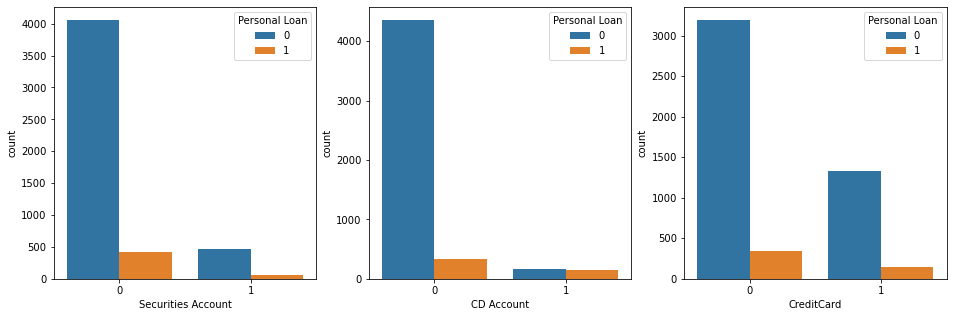

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,5))
sns.countplot(x="Securities Account", data=data ,hue="Personal Loan", ax = ax1)
sns.countplot(x='CD Account' ,data=data ,hue='Personal Loan', ax= ax2)
sns.countplot(x='CreditCard' ,data=data ,hue='Personal Loan', ax= ax3)


- Neither the possession of a securities account nor a credit card with the bank has an impact on the possibility of the customer to purchase the loan.

- A very large percentage of those who do not have CD account do not have the personal loan as well. However, of those who do have a CD account, almost all has the personal loan.

<AxesSubplot:xlabel='Income', ylabel='Count'>

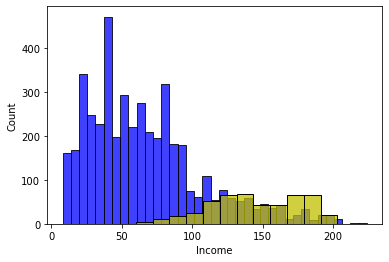

In [29]:
fig, ax = plt.subplots()
sns.histplot(data[data['Personal Loan'] == 0]['Income'], color='b', ax=ax)
sns.histplot(data[data["Personal Loan"] == 1]['Income'], color = 'y', ax=ax)

Those who have a personal loan also have a higher income.

In [30]:
len(data[data["Personal Loan"] == 1])

480

In [31]:
len(data[data["Personal Loan"] == 0])

4520

## Correlation

<AxesSubplot:>

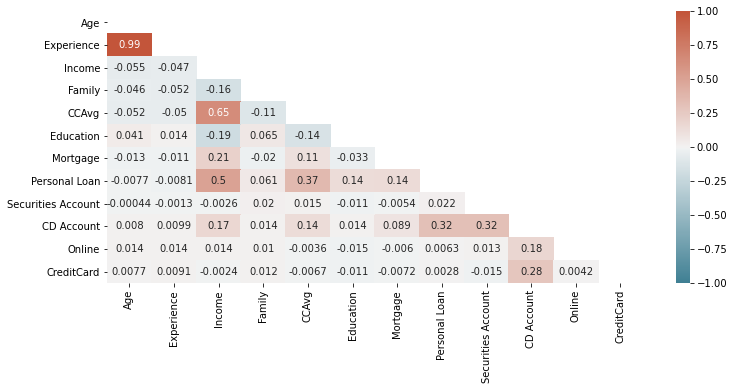

In [32]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(12,5))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = cmap, mask=mask, annot = True)

## Data split

In [33]:
from sklearn.model_selection import train_test_split
X = data.drop(['Personal Loan','Experience'], axis = 1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42, stratify = y)

In [34]:
X_train.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.364571,73.799143,2.379143,1.926546,1.883714,56.085143,0.103429,0.061429,0.595429,0.288000
std,11.524900,46.276169,1.149559,1.742538,0.844205,101.303782,0.304561,0.240149,0.490879,0.452896
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,38.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,63.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


## Model fitting

### Cross validation

In [123]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def get_models():
    models=[]
    models.append(("LR", LogisticRegression()))
    models.append(("NB", GaussianNB()))
    models.append(("DT", DecisionTreeClassifier()))
    models.append(("KNN", KNeighborsClassifier()))
    return models

def cross_validation_scores_of_models(X, y):
    sc = StandardScaler()
    models=get_models()

    results=[]
    names= []
    
    for name, model in models:
        kfold=StratifiedKFold(n_splits=5, shuffle=True,random_state=22)
        pipeline = Pipeline([('transformer', sc), ('estimator', model)])
        cv_result=cross_val_score(pipeline, X, y, cv=kfold, scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("%s has a cross-validation mean accuracy of %.3f +/- %.3f" % (name, cv_result.mean(), cv_result.std()))

In [124]:
cross_validation_scores_of_models(X_train, y_train)

LR has a cross-validation mean accuracy of 0.950 +/- 0.004
NB has a cross-validation mean accuracy of 0.884 +/- 0.013
DT has a cross-validation mean accuracy of 0.976 +/- 0.003
KNN has a cross-validation mean accuracy of 0.954 +/- 0.005


### Logistic Regression

In [125]:
params_lr = [{'C': [0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}]

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)

gslr = GridSearchCV(LogisticRegression(random_state=0, solver = 'liblinear'),
                    param_grid=params_lr,
                    scoring='accuracy',
                    cv=kfold)

gslr_fit = gslr.fit(X_train, y_train)          
y_pred_lr = gslr_fit.predict(X_test)

## best parameter
print(gslr.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_fit.best_estimator_)

## best score
print("Best score: ", gslr.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr.score(X_test, y_test))

{'C': 10, 'penalty': 'l2'}
Logistic parameters: 
 LogisticRegression(C=10, random_state=0, solver='liblinear')
Best score:  0.9511428571428571
Training score:  0.952
Test accuracy:  0.952


In [137]:
print(classification_report(y_test, y_pred_dt))

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_lr), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.952
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.92      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

The Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1336         20
Actual 1         52         92


### Decision Tree

In [129]:
params_dt = [
    {
        'criterion': ["gini", "entropy"],
        'max_depth': np.arange(1,31),
        'max_features': np.arange(1,11),
        'min_samples_leaf':[1,2,3,4,5],
        'min_samples_split':[2,3,4,5]
    }
]

gsdt = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid= params_dt,
                    cv = kfold,
                    scoring='accuracy')

gsdt_fit = gsdt.fit(X_train, y_train)
y_pred_dt = gsdt_fit.predict(X_test)

print(gsdt.best_params_)

## best estimator
print("Tree parameters: \n", gsdt_fit.best_estimator_)

## best score
print("Best score: ", gsdt.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsdt.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gsdt.score(X_test, y_test))

{'criterion': 'gini', 'max_depth': 12, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tree parameters: 
 DecisionTreeClassifier(max_depth=12, max_features=6, min_samples_split=5,
                       random_state=0)
Best score:  0.9845714285714285
Training score:  0.9971428571428571
Test accuracy:  0.9906666666666667


In [130]:
print(classification_report(y_test, y_pred_dt))

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_dt), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.92      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

The Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1353          3
Actual 1         11        133


### KNN

In [131]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

In [138]:
params_knn = [{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
               'weights':['uniform','distance']}]

gsknn = GridSearchCV(KNeighborsClassifier(),
                     param_grid= params_knn,
                     scoring='accuracy',
                     cv=kfold)

gsknn_fit = gsknn.fit(X_train_std, y_train)          
y_pred_knn = gsknn_fit.predict(X_test_std)

## best parameter
print(gsknn.best_params_)

## best estimator
print("KNN parameters: \n", gsknn.best_estimator_)

## best score
print("Best score: ", gsknn.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn.score(X_train_std, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn.score(X_test_std, y_test))

{'n_neighbors': 3, 'weights': 'distance'}
KNN parameters: 
 KNeighborsClassifier(n_neighbors=3, weights='distance')
Best score:  0.9614285714285714
Training score:  1.0
Test accuracy:  0.9606666666666667


In [135]:
print(classification_report(y_test, y_pred_knn))

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.90      0.67      0.76       144

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500

The Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1345         11
Actual 1         48         96


## Conclusion

Decision tree has the highest test accuracy with a score of 0.99 on the test set. Thus, we choose it as our final model.